In [245]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df=pd.read_csv('recent-games.csv')
kills=df['kills']
deaths=df['deaths']
accuracy=df['accuracy']
result=df['result']
not_cheating=df[0:499]
cheating=df[499:1000]

#  The data frame is showing us kills, deaths and accuracy. The "result" column is a 0 for not cheating, and 1 for cheating. These are known values, and are what we will use to train a program to make a determination (based on new inputs) whether or not an individual was cheating.

In [116]:
df

,kills,deaths,accuracy,result
0,9,2,85,0
1,19,10,85,0
2,14,3,72,0
3,7,7,84,0
4,17,9,70,0
...,...,...,...,...
995,75,70,99,1
996,54,52,100,1
997,74,33,100,1
998,61,67,98,1


# If we look at the data visually, we can see that the distribution for the player that was cheating is far more random compared to one that was not. You can clearly see that a separation occurs between the two. The statistical distribution for players who cheat is randomized, and has distinct visual classifications. For those who do not, there is an obvious relationship.

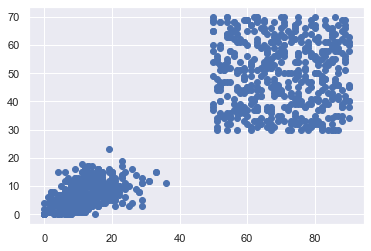

In [117]:
plt.scatter(kills,deaths)
sns.set()

# This separation is much more visible when looking at accuracy.

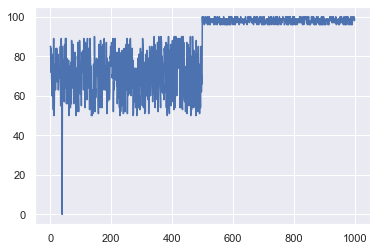

In [121]:
plt.plot(accuracy)
sns.set()

# We are using kills and deaths to make our first determination. We can use importable libraries to do the harder work for us. This makes things much more simple.

In [244]:
kda=df[df.columns[0:3]].to_numpy()
from sklearn.model_selection import train_test_split
from scipy.spatial import distance

X_train, X_test, y_train, y_test=train_test_split(kda, result, train_size=0.99,test_size=0.01, 
                                                   random_state=1)


class kNN():
    def __init__(self,k):
        self.k=k
    def get_train_data(self,train_features,train_labels):
        self.train_features=train_features
        self.labels=train_labels

    
    def predict(self,X_test):
        predictions=[]
        for i in (X_test):
            distances=[]
            for j in (self.train_features):
                temp=distance.euclidean(i,j)
                distances.append(temp)
            a=np.argsort(distances)
            a_0_5=(a[0:self.k])
            s=self.labels[a_0_5]
            s=list(s)
            max_temp=max(set(s),key=s.count)
            
            predictions.append(max_temp)
            
        return predictions
            
K=kNN(k=500)

K.get_train_data(X_train,y_train)

K.predict(X_test)

Key=K.predict(X_test)

from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test, Key)
print('The accuracy of the test data is',acc*100,'%')

The accuracy of the test data is 100.0 %


# Showing results. 

In [243]:
Final=pd.DataFrame(X_test,Key)
#Final[1]
#Final=Final.shift(periods=1, axis=0)
Final=Final.rename(index={0: "Not Cheating", 1: "Cheating"})
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(Final)

               0   1    2
Cheating      69  61   97
Cheating      83  67  100
Not Cheating  24  15   86
Not Cheating   1   4   77
Not Cheating  11   4   84
Cheating      84  61  100
Not Cheating   7  12   88
Cheating      80  56   96
Not Cheating   5   7   65
Not Cheating  16  16   70


# Application

# If someone is suspected of cheating, their game statistics are passed as a new input. If "x" percent of games show up as possible instances of cheating, their accounts are immediately flagged. This streamlines the report process. A security team cannot look at every account that is reported, but they CAN look at flagged accounts from a computer program.